In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [14]:
data = pd.read_csv('homeprices.csv')

In [15]:
df = data.copy()
print(df)

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


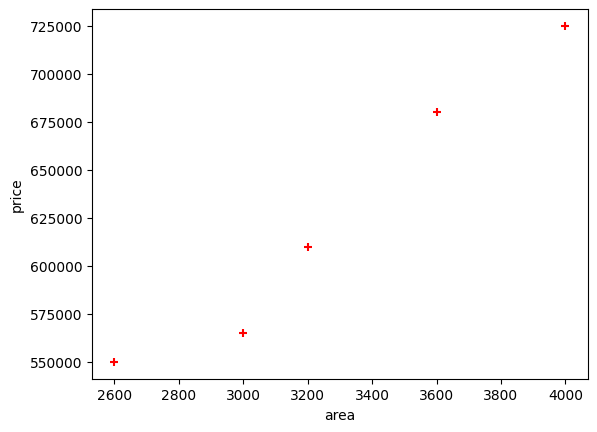

In [16]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price, color = 'red', marker = "+")

In [17]:
#destination is suitable for linear regression

In [18]:
df[['area']]

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [27]:
reg = linear_model.LinearRegression()
reg.fit( df[['area']], df.price)

LinearRegression()

In [37]:
sample = np.array(3300).reshape(1,1)

In [38]:
reg.predict(sample)

C:\Users\Shahin Satov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [42]:
# y = mx +b 

#m is coefficient
#b is intercept

print(reg.coef_)
print(reg.intercept_)

[135.78767123]
180616.43835616432


In [45]:
# y = mx + b
y = reg.coef_*sample + reg.intercept_
y

#result is the calculation of that prediction

array([[628715.75342466]])

In [46]:
d = pd.read_csv('areas.csv')

In [47]:
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [48]:
reg.predict(d)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [50]:
d['predicted_prices'] = reg.predict(d)

In [55]:
d.predicted_prices = d.predicted_prices.apply(lambda x : "%.4f" % x)

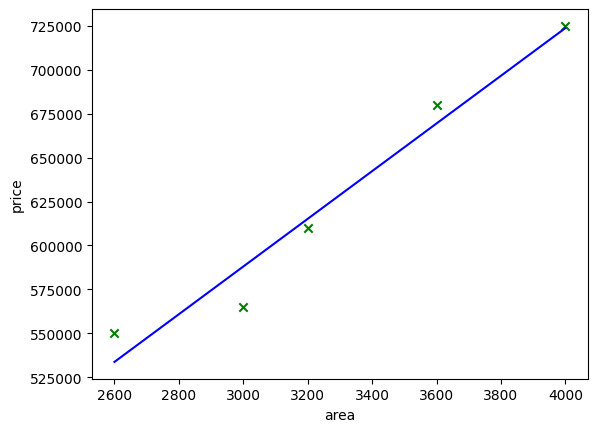

In [58]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area , df.price, color = 'green', marker= "x")
plt.plot(df.area,reg.predict(df[['area']]), color = 'blue')

In [59]:
##PRACTICE

In [62]:
cad = pd.read_csv('practice.csv')

In [64]:
cad.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [65]:
from sklearn import linear_model

In [66]:
model = linear_model.LinearRegression()

In [78]:
y = cad.columns[-1]
cad[y]
x = cad.drop(y, axis =1)

In [80]:
model.fit(x,cad[y])

LinearRegression()

In [105]:
years = np.arange(2017, 2022).reshape(-1,1)

In [107]:
years

array([[2017],
       [2018],
       [2019],
       [2020],
       [2021]])

In [108]:
model.predict(years)

C:\Users\Shahin Satov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442,
       42117.15916964])

In [109]:
pred = model.coef_*years + model.intercept_

In [110]:
pred

array([[38803.29886875],
       [39631.76394397],
       [40460.22901919],
       [41288.69409442],
       [42117.15916964]])

In [123]:
final = pd.DataFrame(years, columns = ['year'])

In [124]:
final['prediction'] = pred

In [125]:
final

,year,prediction
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170
